# Frontal Detection Analysis (front crossing rates)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
file_path = "/glade/work/kdagon/FrontDetector/CESMOutputs/"

In [3]:
fronts_file = "cesm_fronts_2000-2005.nc"
onehot_file = "cesm_frontsOneHot_2000-2005.nc"
rates_file = "cesm_frontRates_2000-2005.nc"

## Read in front rates file

In [4]:
rates_fronts = xr.open_dataset(file_path+rates_file)

In [5]:
rates_fronts

<xarray.Dataset>
Dimensions:                          (bnds: 2, front: 5, lat: 68, lon: 141, months: 72, months12: 12, seasons: 25, seasons4: 4, total: 1, years: 6)
Coordinates:
  * lat                              (lat) float64 10.0 11.0 12.0 ... 76.0 77.0
  * lon                              (lon) float64 189.0 190.0 ... 328.0 329.0
  * months                           (months) object 2000-01-15 00:00:00 ... 2005-12-15 00:00:00
    clim_months                      (months12) object ...
  * seasons                          (seasons) object 2000-01-15 00:00:00 ... 2005-12-15 00:00:00
    clim_seasons                     (seasons4) object ...
  * years                            (years) object 2000-07-15 00:00:00 ... 2005-07-15 00:00:00
    front_type                       (front) object ...
Dimensions without coordinates: bnds, front, months12, seasons4, total
Data variables:
    month_bounds                     (months, bnds) object ...
    clim_month_bounds                (months12, 

In [6]:
srates_clim = rates_fronts.seasonal_rate_climatology

In [14]:
# approx. lat/lon here to get a CONUS rectangular region
srates_clim_CONUS = srates_clim.sel(lat=slice(26,50), lon=slice(235,292))

In [17]:
srates_clim_CONUS_mean_wk = srates_clim_CONUS.mean(("lon","lat"))*7 # convert counts/day to counts/wk

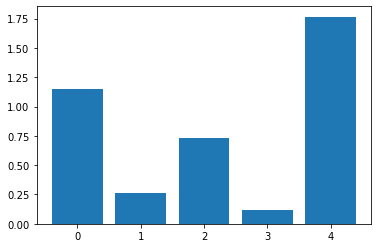

In [37]:
# DJF rates across front types
plt.bar(srates_clim_CONUS_mean_wk.front, srates_clim_CONUS_mean_wk[0]);

In [39]:
srates_clim_CONUS_mean_wk[:,0]

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4)>
array([1.1495355 , 1.0800674 , 0.71795475, 1.0774801 ], dtype=float32)
Coordinates:
    clim_seasons  (seasons4) object ...
    front_type    object ...
Dimensions without coordinates: seasons4

In [32]:
# sum along front types (leaving none type out)
srates_clim_CONUS_mean_wk[:,:4].sum("front")

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4)>
array([2.2620063, 2.2117252, 1.8667715, 2.0572062], dtype=float32)
Coordinates:
    clim_seasons  (seasons4) object ...
Dimensions without coordinates: seasons4

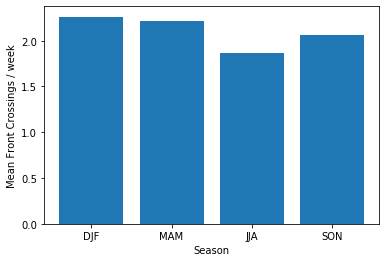

In [36]:
fig, ax = plt.subplots()

ax.bar(srates_clim_CONUS_mean_wk.seasons4, srates_clim_CONUS_mean_wk[:,:4].sum("front"))

labels = ['DJF', 'MAM', 'JJA', 'SON']
x = np.arange(len(labels))  # the label locations

ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels);

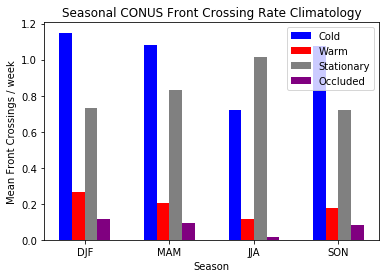

In [48]:
fig, ax = plt.subplots()

w = 0.15
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x + (w*(1-nseason)/2) + 0*w
ax.bar(position, srates_clim_CONUS_mean_wk[:,0], width=w, label="Cold", color='blue')
position = x + (w*(1-nseason)/2) + 1*w
ax.bar(position, srates_clim_CONUS_mean_wk[:,1], width=w, label="Warm", color='red')
position = x + (w*(1-nseason)/2) + 2*w
ax.bar(position, srates_clim_CONUS_mean_wk[:,2], width=w, label="Stationary", color='grey')
position = x + (w*(1-nseason)/2) + 3*w
ax.bar(position, srates_clim_CONUS_mean_wk[:,3], width=w, label="Occluded", color='purple')

ax.set_title('Seasonal CONUS Front Crossing Rate Climatology')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();